<a href="https://colab.research.google.com/github/sudi007/ME-592HW1/blob/main/Final_Assignment_Sudesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip list
#!pip install chart-studio
!pip install opencv-python

Package                       Version
----------------------------- --------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl 

In [2]:
!pip install plotly-express

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
import plotly_express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go


Task_2.1:Sudoku

(423, 419)


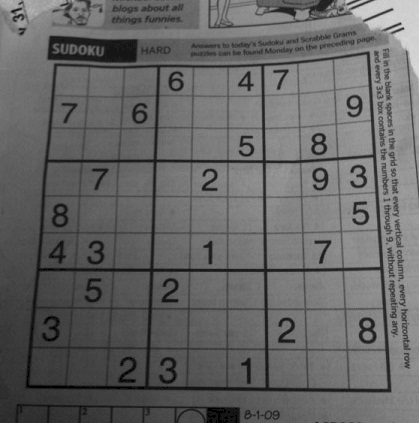

In [4]:
import cv2
from google.colab.patches import cv2_imshow
# last argument 1 is for rgb, 0 is for grayscale
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ME 592X/sudoku-original.png',0)
print(img.shape)
cv2_imshow(img)

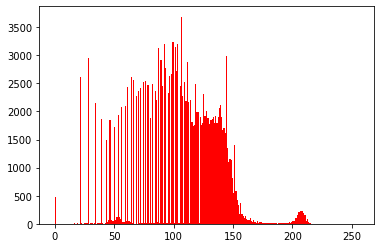

In [5]:

_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

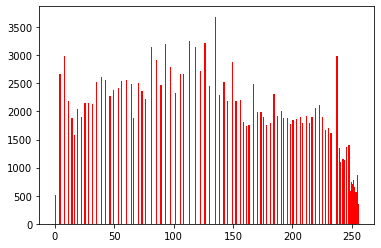

In [6]:
# histogram equalization can be used to improve constrast of img
equ = cv2.equalizeHist(img)
_ = plt.hist(equ.flatten(),256,[0,256], color = 'r')

In [7]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ME 592X/sudoku-original.png',0)
print(type(img))
print(img.shape)
print(img)

<class 'numpy.ndarray'>
(423, 419)
[[168 164 170 ... 206 206 206]
 [168 164 170 ... 205 205 205]
 [165 163 164 ... 206 206 206]
 ...
 [ 43  43  43 ... 130 133 136]
 [ 46  45  43 ... 132 134 134]
 [ 48  47  43 ... 132 132 131]]


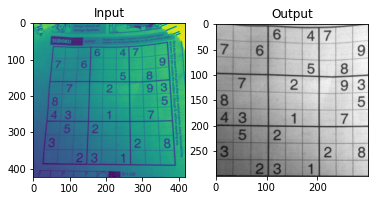

In [8]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
Original = cv2.getPerspectiveTransform(pts1,pts2)
Squared_ = cv2.warpPerspective(img,Original,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(Squared_,cmap='gray'),plt.title('Output')
plt.show()

2.2:Time series

In [9]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ME 592X/energydata_complete.csv')
df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097


In [10]:
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            df[cols[i]] = pd.to_datetime(df[cols[i]],infer_datetime_format=True)
            #df[cols[i]] = pd.to_datetime(df[cols[i]], format='%d-%m-%Y %H:%M')
    return df
                
df = downcast(df)

In [ ]:
fig = px.line(df, x='date', y=df.columns[:], title='All Features over time')
fig.show()

In [11]:
fig = px.line(df,x='date',y='Appliances',title='Appliance Energy Consumption For whole year ')
fig.show()

In [12]:
df_week = df[0:1050].copy()

In [13]:
Appliances_Energy_Consumption_week = px.line(df_week, x='date', y='Appliances', title='Appliances Energy Consumption For one week')
Appliances_Energy_Consumption_week.show()

In [14]:
df_hourly=df.copy()

# weekday column for plotting 
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaysnum = [0,1,2,3,4,5,6] # The day of the week with Monday=0 to Sunday=6 with pd.dayofweek



In [15]:
df_hourly['weekday'] = [i.dayofweek for i in df_hourly['date']] # The day of the week with Monday=0 to Sunday=6.

In [16]:
for a,b in zip(weekdays, weekdaysnum):
    df_hourly['weekday'] = df_hourly['weekday'].replace(b, a)

In [17]:
df_hourly['week'] = df_hourly['date'].dt.isocalendar().week



In [18]:
df_hourly['hour'] = df_hourly['date'].dt.hour


In [19]:
heatdf = pd.DataFrame(df_hourly.groupby(['week', 'weekday','hour'])['Appliances'].sum()).reset_index()

In [20]:
heatdf["weekday"] = pd.Categorical(heatdf.weekday, categories=weekdays, ordered=True)

In [21]:

heatdf.pivot_table(index="weekday", columns="hour", values="Appliances", aggfunc='first')


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
Monday,270,260,260,250,270,200,330,330,210,270,190,270,240,240,250,200,280,330,1060,1040,750,620,1600,340
Tuesday,850,1010,270,210,270,260,240,340,520,260,1380,330,1120,910,820,220,240,1310,350,330,310,250,280,260
Wednesday,190,290,270,190,270,250,400,380,1250,1320,400,360,250,210,270,250,480,580,670,1280,1490,1880,790,250
Thursday,280,220,260,270,210,270,240,1360,960,1010,3230,1430,1700,420,780,310,1850,2430,1300,1390,660,700,290,230
Friday,320,310,280,260,300,300,270,310,1410,1240,750,750,1260,1180,380,340,340,590,1670,1320,1400,1380,1310,380
Saturday,240,320,280,250,300,240,310,1480,840,370,430,320,450,520,430,1250,450,1590,2840,2350,710,720,1020,330
Sunday,280,310,260,300,310,260,270,2090,1630,1750,540,1910,710,1020,830,490,490,2730,1610,610,660,780,330,380


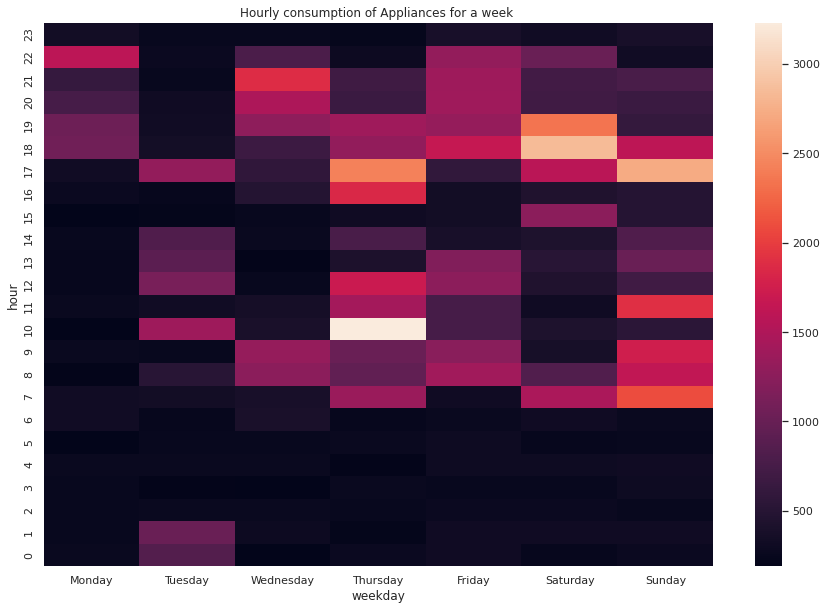

In [22]:
sns.set()
Hourly_Plot=heatdf.pivot_table(index="hour", columns="weekday", values="Appliances", aggfunc='first')
plt.figure(figsize = (15,10))
ax = sns.heatmap(Hourly_Plot)
ax.invert_yaxis()
plt.title("Hourly consumption of Appliances for a week ")
plt.show()

Text(0.5, 1.0, 'Histogram of energy consumption of Appliances')

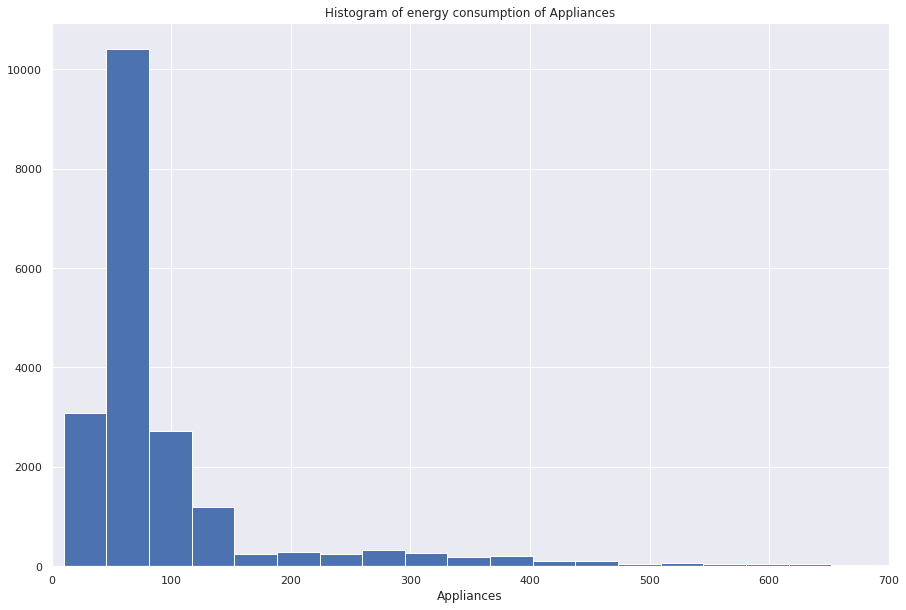

In [23]:
plt.figure(figsize = (15,10))
df['Appliances'].hist(bins=30)
plt.xlabel('Appliances')
plt.xlim([0,700])
plt.title("Histogram of energy consumption of Appliances")

In [24]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Energy Consumption'],
      dtype='object')

In [40]:
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time
df['Hours']=pd.to_datetime(df['date']).dt.hour

In [42]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption,Dates,Time,Hours
0,2016-01-11 17:00:00,60,30,19.890625,47.59375,19.203125,44.78125,19.796875,44.71875,19.000000,45.56250,17.171875,55.18750,7.027344,84.2500,17.203125,41.62500,18.203125,48.90625,17.031250,45.53125,6.601562,733.5,92.00000,7.000000,63.000000,5.300781,13.273438,2016-01-11,17:00:00,17
1,2016-01-11 17:10:00,60,30,19.890625,46.68750,19.203125,44.71875,19.796875,44.78125,19.000000,46.00000,17.171875,55.18750,6.832031,84.0625,17.203125,41.56250,18.203125,48.87500,17.062500,45.56250,6.480469,733.5,92.00000,6.667969,59.156250,5.199219,18.609375,2016-01-11,17:10:00,17
2,2016-01-11 17:20:00,50,30,19.890625,46.31250,19.203125,44.62500,19.796875,44.93750,18.921875,45.87500,17.171875,55.09375,6.558594,83.1875,17.203125,41.43750,18.203125,48.71875,17.000000,45.50000,6.371094,733.5,92.00000,6.332031,55.343750,5.101562,28.640625,2016-01-11,17:20:00,17
3,2016-01-11 17:30:00,50,40,19.890625,46.06250,19.203125,44.59375,19.796875,45.00000,18.890625,45.71875,17.171875,55.09375,6.433594,83.4375,17.140625,41.28125,18.093750,48.59375,17.000000,45.40625,6.250000,734.0,92.00000,6.000000,51.500000,5.000000,45.406250,2016-01-11,17:30:00,17
4,2016-01-11 17:40:00,60,40,19.890625,46.34375,19.203125,44.53125,19.796875,45.00000,18.890625,45.53125,17.203125,55.09375,6.367188,84.8750,17.203125,41.21875,18.093750,48.59375,17.000000,45.40625,6.128906,734.0,92.00000,5.667969,47.656250,4.898438,10.085938,2016-01-11,17:40:00,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.562500,46.56250,25.890625,42.03125,27.203125,41.15625,24.703125,45.59375,23.203125,52.40625,24.796875,1.0000,24.500000,44.50000,24.703125,50.06250,23.203125,46.78125,22.703125,755.0,55.65625,3.333984,23.671875,13.296875,43.093750,2016-05-27,17:20:00,17
19731,2016-05-27 17:30:00,90,0,25.500000,46.50000,25.750000,42.09375,27.140625,41.21875,24.703125,45.59375,23.234375,52.31250,24.203125,1.0000,24.562500,44.40625,24.703125,49.78125,23.203125,46.78125,22.593750,755.0,56.00000,3.500000,24.500000,13.296875,49.281250,2016-05-27,17:30:00,17
19732,2016-05-27 17:40:00,270,10,25.500000,46.59375,25.625000,42.78125,27.046875,41.68750,24.703125,45.71875,23.234375,52.28125,23.625000,1.0000,24.546875,44.40625,24.703125,49.65625,23.203125,46.78125,22.500000,755.0,56.34375,3.666016,25.328125,13.296875,29.203125,2016-05-27,17:40:00,17
19733,2016-05-27 17:50:00,420,10,25.500000,47.00000,25.406250,43.03125,26.890625,41.28125,24.703125,45.78125,23.203125,52.18750,22.437500,1.0000,24.500000,44.28125,24.656250,49.53125,23.203125,46.81250,22.296875,755.0,56.65625,3.833984,26.171875,13.203125,6.324219,2016-05-27,17:50:00,17


In [46]:
from datetime import datetime

def how_many_seconds_until_midnight(hours):
    """Get the number of seconds until midnight."""
    return ((24 - hours ) * 60 * 60)

In [48]:
df['NSM']=df['Hours'].apply(how_many_seconds_until_midnight)

In [49]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption,Dates,Time,Hours,NSM
0,2016-01-11 17:00:00,60,30,19.890625,47.59375,19.203125,44.78125,19.796875,44.71875,19.000000,45.56250,17.171875,55.18750,7.027344,84.2500,17.203125,41.62500,18.203125,48.90625,17.031250,45.53125,6.601562,733.5,92.00000,7.000000,63.000000,5.300781,13.273438,2016-01-11,17:00:00,17,25200
1,2016-01-11 17:10:00,60,30,19.890625,46.68750,19.203125,44.71875,19.796875,44.78125,19.000000,46.00000,17.171875,55.18750,6.832031,84.0625,17.203125,41.56250,18.203125,48.87500,17.062500,45.56250,6.480469,733.5,92.00000,6.667969,59.156250,5.199219,18.609375,2016-01-11,17:10:00,17,25200
2,2016-01-11 17:20:00,50,30,19.890625,46.31250,19.203125,44.62500,19.796875,44.93750,18.921875,45.87500,17.171875,55.09375,6.558594,83.1875,17.203125,41.43750,18.203125,48.71875,17.000000,45.50000,6.371094,733.5,92.00000,6.332031,55.343750,5.101562,28.640625,2016-01-11,17:20:00,17,25200
3,2016-01-11 17:30:00,50,40,19.890625,46.06250,19.203125,44.59375,19.796875,45.00000,18.890625,45.71875,17.171875,55.09375,6.433594,83.4375,17.140625,41.28125,18.093750,48.59375,17.000000,45.40625,6.250000,734.0,92.00000,6.000000,51.500000,5.000000,45.406250,2016-01-11,17:30:00,17,25200
4,2016-01-11 17:40:00,60,40,19.890625,46.34375,19.203125,44.53125,19.796875,45.00000,18.890625,45.53125,17.203125,55.09375,6.367188,84.8750,17.203125,41.21875,18.093750,48.59375,17.000000,45.40625,6.128906,734.0,92.00000,5.667969,47.656250,4.898438,10.085938,2016-01-11,17:40:00,17,25200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.562500,46.56250,25.890625,42.03125,27.203125,41.15625,24.703125,45.59375,23.203125,52.40625,24.796875,1.0000,24.500000,44.50000,24.703125,50.06250,23.203125,46.78125,22.703125,755.0,55.65625,3.333984,23.671875,13.296875,43.093750,2016-05-27,17:20:00,17,25200
19731,2016-05-27 17:30:00,90,0,25.500000,46.50000,25.750000,42.09375,27.140625,41.21875,24.703125,45.59375,23.234375,52.31250,24.203125,1.0000,24.562500,44.40625,24.703125,49.78125,23.203125,46.78125,22.593750,755.0,56.00000,3.500000,24.500000,13.296875,49.281250,2016-05-27,17:30:00,17,25200
19732,2016-05-27 17:40:00,270,10,25.500000,46.59375,25.625000,42.78125,27.046875,41.68750,24.703125,45.71875,23.234375,52.28125,23.625000,1.0000,24.546875,44.40625,24.703125,49.65625,23.203125,46.78125,22.500000,755.0,56.34375,3.666016,25.328125,13.296875,29.203125,2016-05-27,17:40:00,17,25200
19733,2016-05-27 17:50:00,420,10,25.500000,47.00000,25.406250,43.03125,26.890625,41.28125,24.703125,45.78125,23.203125,52.18750,22.437500,1.0000,24.500000,44.28125,24.656250,49.53125,23.203125,46.81250,22.296875,755.0,56.65625,3.833984,26.171875,13.203125,6.324219,2016-05-27,17:50:00,17,25200


In [73]:
Energy_NSM = px.histogram(df, x='Energy Consumption', y='NSM', title='Energy Consumption Before Midnight')
Energy_NSM.show()


In [74]:
Energy_Press_mm_Hg=px.histogram(df, x='Energy Consumption', y='Press_mm_hg', title='Energy Consumption of Press_mm_Hg')
Energy_Press_mm_Hg.show()


Task_2.3:Nasa Data 

why nsm and press_mm_hg are main contributing factors for the energy consumption is beacuse energy during night time is used a lot as people are at home cooking watching tvs and running multiple appliances 

In [28]:
import statistics
Nasa_Data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ME 592X/airfoil_self_noise.csv')
Nasa_Data.head()

,Frequency,Angle of attack,Chord length,velocity,"thickness,",Pressure Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [29]:
pd.DataFrame([Nasa_Data.mean(), Nasa_Data.std(), Nasa_Data.var(),Nasa_Data.median(),Nasa_Data.kurtosis(),Nasa_Data.skew(),Nasa_Data.max(),Nasa_Data.min()], index=['Mean', 'Std. dev', 'Variance','Median','Kurtosis','Skewness','Maximum','Minimum']).round(decimals=2)

,Frequency,Angle of attack,Chord length,velocity,"thickness,",Pressure Level
Mean,2886.38,6.78,0.14,50.86,0.01,124.84
Std. dev,3152.57,5.92,0.09,15.57,0.01,6.90
Variance,9938717.38,35.02,0.01,242.51,0.00,47.59
Median,1600.00,5.40,0.10,39.60,0.00,125.72
Kurtosis,5.71,-0.41,-1.04,-1.56,2.22,-0.31
Skewness,2.14,0.69,0.46,0.24,1.70,-0.42
Maximum,20000.00,22.20,0.30,71.30,0.06,140.99
Minimum,200.00,0.00,0.03,31.70,0.00,103.38
